In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn as sns
import yfinance as yf

def print_versions():
    print(f"numpy version: {np.__version__}")
    print(f"pandas version: {pd.__version__}")
    print(f"scikit-learn version: {sklearn.__version__}")
    print(f"matplotlib version: {matplotlib.__version__}")
    print(f"seaborn version: {sns.__version__}")
    print(f"yfinance version: {yf.__version__}")

if __name__ == "__main__":
    print_versions()

numpy version: 1.24.3
pandas version: 2.1.4
scikit-learn version: 1.2.2
matplotlib version: 3.6.3
seaborn version: 0.12.2
yfinance version: 0.2.35


In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

In [35]:
# 输入股票名
stock_name = input("请输入你想分析的股票名：")

# 输入开始和结束日期
start_date = input("请输入开始日期（格式：YYYY-MM-DD）：")
end_date = input("请输入结束日期（格式：YYYY-MM-DD）：")

# 计算获取额外数据的日期
extra_days = 20  # 这里设置提前获取20天的数据用于计算，可以根据需要调整
start_date_extended = pd.to_datetime(start_date) - pd.Timedelta(days=extra_days)

# 获取股票数据
data = yf.download(stock_name, start=start_date_extended.strftime('%Y-%m-%d'), end=end_date)
#
# 计算每日涨跌幅
data['Previous Close'] = data['Close'].shift(1)
data['Percentage Change'] = (data['Close'] - data['Previous Close']) / data['Previous Close'] * 100

# 处理第一行的缺失值，设为默认值
data.iloc[0, data.columns.get_loc('Previous Close')] = data.iloc[0]['Open']
data.iloc[0, data.columns.get_loc('Percentage Change')] = 0

# 生成前十天的收盘价和涨跌幅作为特征
for i in range(1, 11):
    data[f'Close_{i}'] = data['Close'].shift(i)
    data[f'Percentage_Change_{i}'] = data['Percentage Change'].shift(i)

# 选择指定日期范围内的数据
data_filtered = data[start_date:]

# 选择所需的列并重命名
final_data = data_filtered[['Open', 'High', 'Low', 'Close', 'Previous Close', 'Percentage Change', 
                            'Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Close_6', 'Close_7', 'Close_8', 'Close_9', 'Close_10',
                            'Percentage_Change_1', 'Percentage_Change_2', 'Percentage_Change_3', 'Percentage_Change_4', 'Percentage_Change_5', 
                            'Percentage_Change_6', 'Percentage_Change_7', 'Percentage_Change_8', 'Percentage_Change_9', 'Percentage_Change_10']]
final_data.columns = ['开盘价', '最高价', '最低价', '收盘价', '昨收价', '涨跌幅', 
                      '前1天收盘价', '前2天收盘价', '前3天收盘价', '前4天收盘价', '前5天收盘价', 
                      '前6天收盘价', '前7天收盘价', '前8天收盘价', '前9天收盘价', '前10天收盘价',
                      '前1天涨跌幅', '前2天涨跌幅', '前3天涨跌幅', '前4天涨跌幅', '前5天涨跌幅', 
                      '前6天涨跌幅', '前7天涨跌幅', '前8天涨跌幅', '前9天涨跌幅', '前10天涨跌幅']

# 存储为CSV文件，文件名为输入的股票名
final_data.to_csv(stock_name + '_features.csv')

# 屏幕输出
print(f"已下载{stock_name}的股票数据，并保存为{stock_name}_features.csv")

请输入你想分析的股票名：BIDU
请输入开始日期（格式：YYYY-MM-DD）：2020-01-01
请输入结束日期（格式：YYYY-MM-DD）：2024-06-01


[*********************100%%**********************]  1 of 1 completed


已下载BIDU的股票数据，并保存为BIDU_features.csv


请输入你想查看移动平滑价格线的股票名：BIDU


E:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


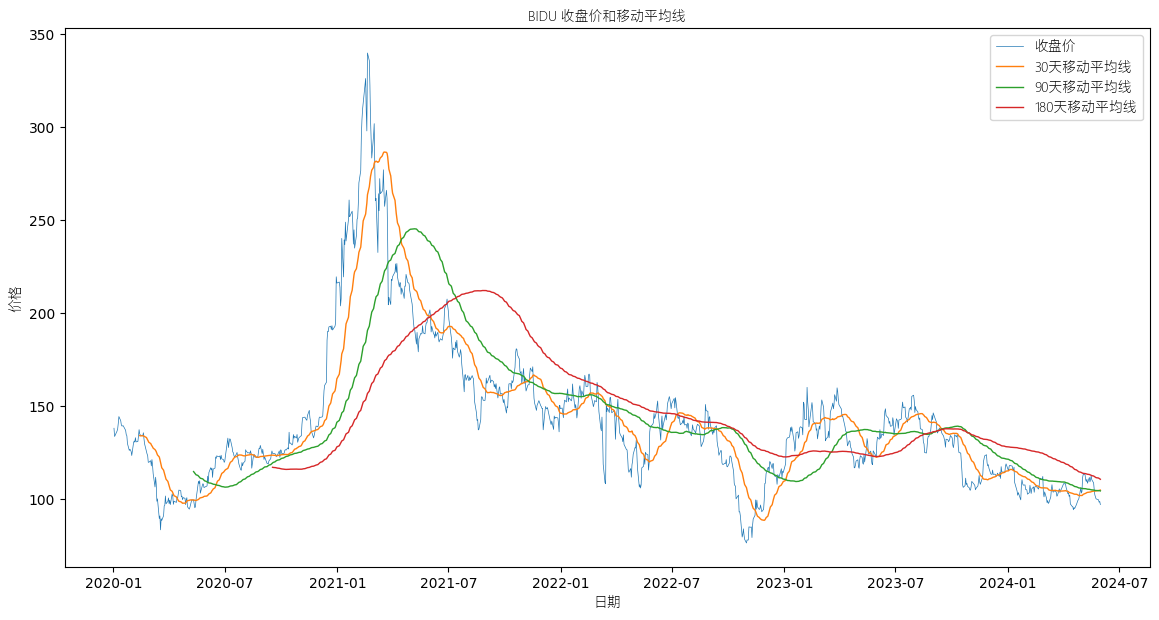

In [36]:
# 读取并设置中文字体
font_path = '微软雅黑.ttf'  # 系统中中文字体的路径
font_prop = fm.FontProperties(fname=font_path)

# 用户输入股票名
stock_name = input("请输入你想查看移动平滑价格线的股票名：")
file_path = f"{stock_name}_features.csv" 

# 读取CSV文件
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# 计算移动平均线
data['MA30'] = data['收盘价'].rolling(window=30).mean()  # 30天移动平均线
data['MA90'] = data['收盘价'].rolling(window=90).mean()  # 90天移动平均线
data['MA180'] = data['收盘价'].rolling(window=180).mean()  # 180天移动平均线

# 绘制收盘价和移动平均线图
plt.figure(figsize=(14, 7))
plt.plot(data['收盘价'], label='收盘价', linewidth=0.5)
plt.plot(data['MA30'], label='30天移动平均线', linewidth=1)
plt.plot(data['MA90'], label='90天移动平均线', linewidth=1)
plt.plot(data['MA180'], label='180天移动平均线', linewidth=1)

# 设置标题和标签，并使用中文字体
plt.title(f'{stock_name} 收盘价和移动平均线', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('价格', fontproperties=font_prop)
plt.legend(prop=font_prop)

# 显示图表
plt.show()


In [ ]:
data

In [37]:
import pandas as pd

# 用户输入股票名
stock_name = input("请输入你想分析的股票名：")
file_path = f"{stock_name}_features.csv"  # CSV文件以股票名命名

# 读取CSV文件
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# 设置日期为索引
data.index = pd.to_datetime(data.index)

data.head()

请输入你想分析的股票名：BIDU


,开盘价,最高价,最低价,收盘价,昨收价,涨跌幅,前1天收盘价,前2天收盘价,前3天收盘价,前4天收盘价,...,前1天涨跌幅,前2天涨跌幅,前3天涨跌幅,前4天涨跌幅,前5天涨跌幅,前6天涨跌幅,前7天涨跌幅,前8天涨跌幅,前9天涨跌幅,前10天涨跌幅
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,129.490005,138.639999,129.440002,138.220001,126.400002,9.351265,126.400002,126.290001,126.449997,127.580002,...,0.087102,-0.126529,-0.885723,-0.708229,-0.263911,1.051066,-0.452885,1.089277,2.301362,0.527635
2020-01-03,134.580002,137.160004,133.779999,133.800003,138.220001,-3.197799,138.220001,126.400002,126.290001,126.449997,...,9.351265,0.087102,-0.126529,-0.885723,-0.708229,-0.263911,1.051066,-0.452885,1.089277,2.301362
2020-01-06,132.779999,136.740005,132.509995,135.940002,133.800003,1.599402,133.800003,138.220001,126.400002,126.290001,...,-3.197799,9.351265,0.087102,-0.126529,-0.885723,-0.708229,-0.263911,1.051066,-0.452885,1.089277
2020-01-07,138.190002,139.470001,135.399994,136.699997,135.940002,0.559066,135.940002,133.800003,138.220001,126.400002,...,1.599402,-3.197799,9.351265,0.087102,-0.126529,-0.885723,-0.708229,-0.263911,1.051066,-0.452885
2020-01-08,136.740005,139.169998,135.699997,137.830002,136.699997,0.826631,136.699997,135.940002,133.800003,138.220001,...,0.559066,1.599402,-3.197799,9.351265,0.087102,-0.126529,-0.885723,-0.708229,-0.263911,1.051066


In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# 特征列
feature_columns = [ '前1天收盘价', '前2天收盘价', '前3天收盘价', '前4天收盘价', '前5天收盘价', 
                    '前6天收盘价', '前7天收盘价', '前8天收盘价', '前9天收盘价', '前10天收盘价',
                    '前1天涨跌幅', '前2天涨跌幅', '前3天涨跌幅', '前4天涨跌幅', '前5天涨跌幅', 
                    '前6天涨跌幅', '前7天涨跌幅', '前8天涨跌幅', '前9天涨跌幅', '前10天涨跌幅']
# 目标列
target_column = '收盘价'

# 划分训练集和测试集
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# 处理NaN值
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 使用验证集选择最佳参数
param_grid = {
    'n_estimators': [80, 100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [8, 10, 15]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print(f'最佳参数: {best_params}')

最佳参数: {'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 200}


平均绝对误差: 2.4285301525044525
均方根误差: 3.1413680623573463
    Feature  Importance
0    前1天收盘价    0.933057
1    前2天收盘价    0.049532
2    前3天收盘价    0.005609
15   前6天涨跌幅    0.001117
4    前5天收盘价    0.001053
19  前10天涨跌幅    0.001039
11   前2天涨跌幅    0.000824
14   前5天涨跌幅    0.000765
18   前9天涨跌幅    0.000740
13   前4天涨跌幅    0.000720
12   前3天涨跌幅    0.000701
10   前1天涨跌幅    0.000666
17   前8天涨跌幅    0.000618
16   前7天涨跌幅    0.000601
9   前10天收盘价    0.000593
3    前4天收盘价    0.000568
6    前7天收盘价    0.000530
8    前9天收盘价    0.000480
7    前8天收盘价    0.000449
5    前6天收盘价    0.000339


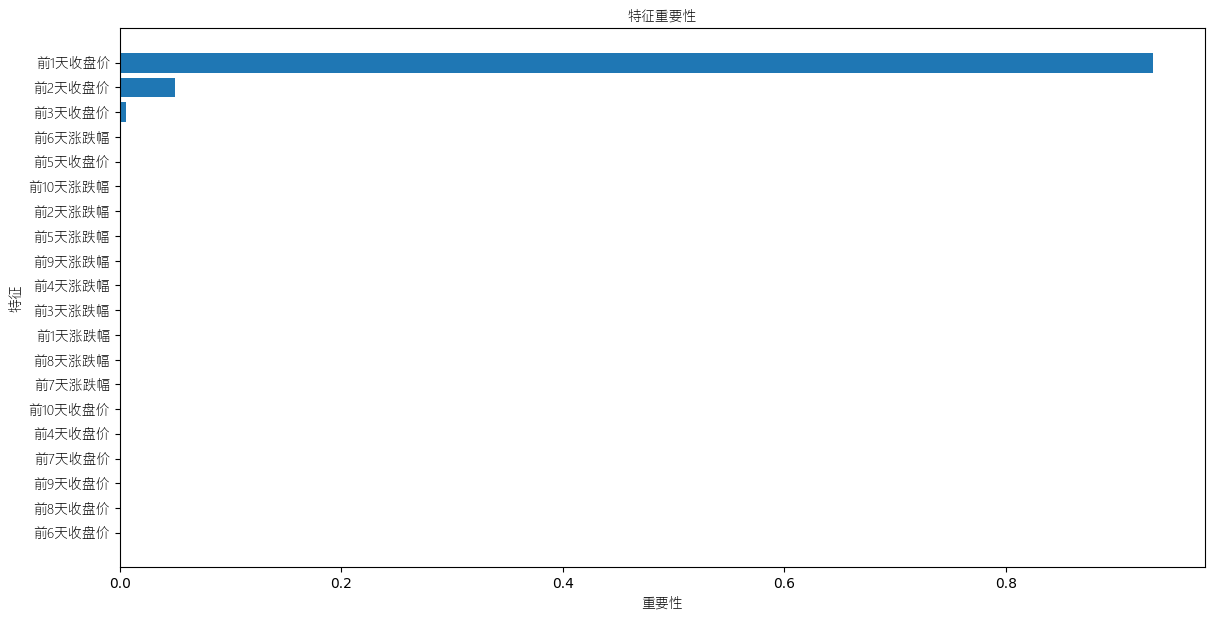

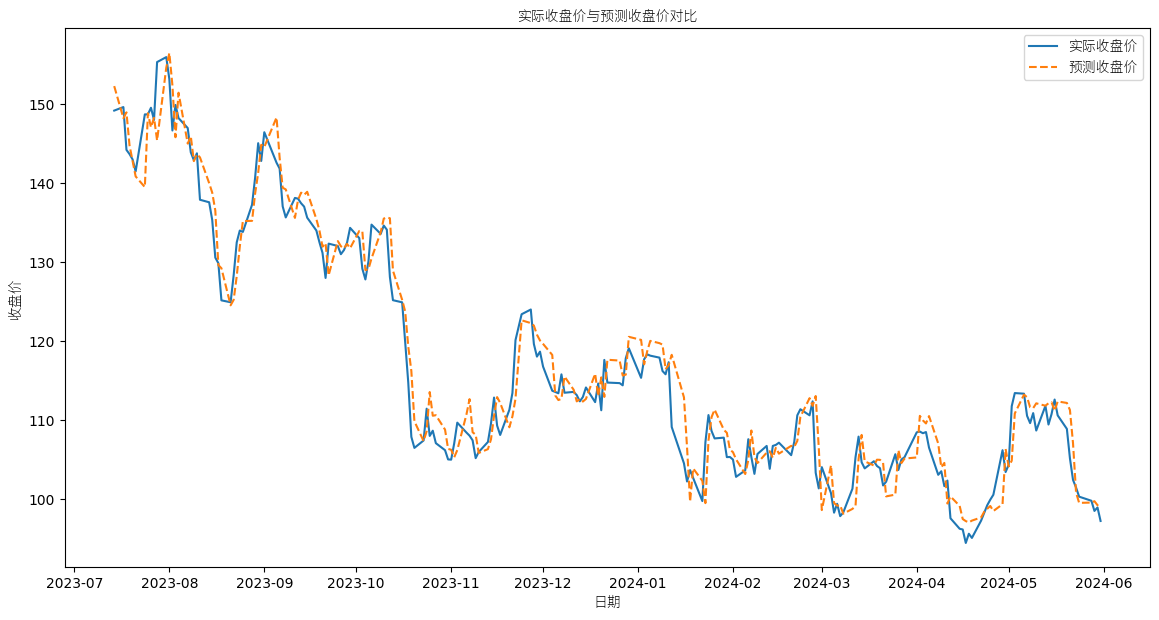

In [39]:
# 使用最佳参数训练最终模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 预测
y_pred = best_model.predict(X_test)

# 评估模型
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'平均绝对误差: {mae}')
print(f'均方根误差: {rmse}')

# 输出特征重要性
feature_importances = best_model.feature_importances_

# 创建一个DataFrame来存储特征名称和对应的重要性
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

# 按重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# 绘制特征重要性的柱状图
plt.figure(figsize=(14, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('重要性', fontproperties=font_prop)
plt.ylabel('特征', fontproperties=font_prop)
plt.title('特征重要性', fontproperties=font_prop)
# 获取当前的 y 轴标签并设置字体属性
plt.yticks(fontproperties=font_prop)
# 反转 y 轴顺序
plt.gca().invert_yaxis()
plt.show()
# 分析预测结果
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, y_test, label='实际收盘价')
plt.plot(test_data.index, y_pred, label='预测收盘价', linestyle='--')

# 设置图例字体属性
plt.legend(prop=font_prop)

# 设置标题和坐标轴标签的字体属性
plt.title('实际收盘价与预测收盘价对比', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('收盘价', fontproperties=font_prop)

plt.show()

请输入预测未来的天数: 30


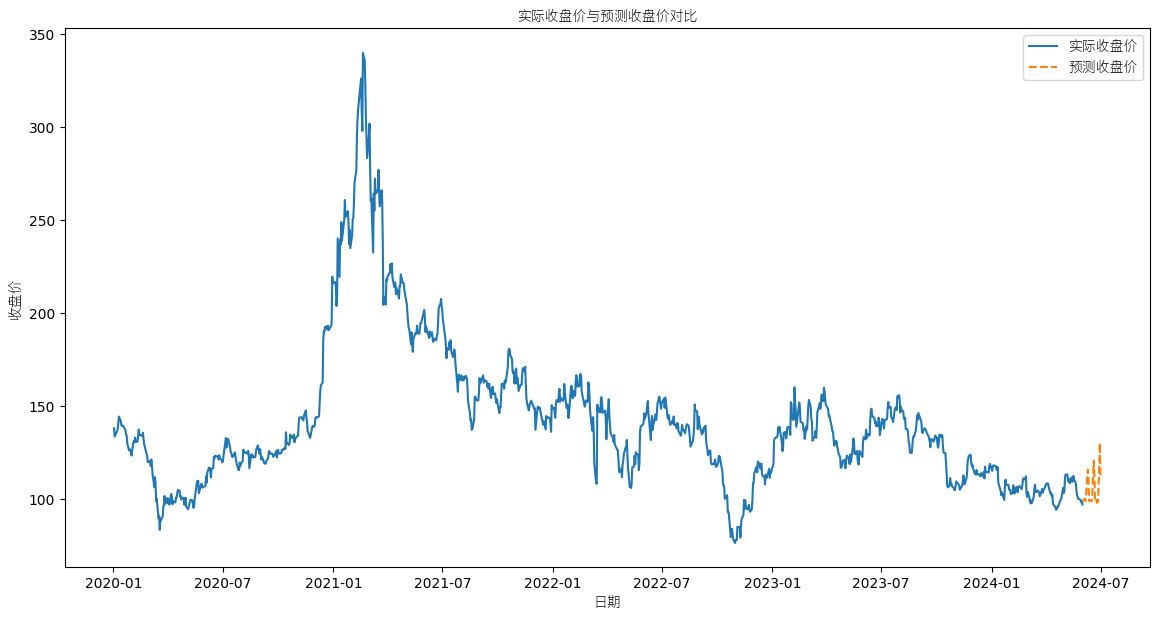

In [43]:
# 让用户输入预测的天数
future_days = int(input("请输入预测未来的天数: "))

# 初始化预测列表
future_predictions = []

# 使用最后一天的数据作为初始输入
last_row = data.iloc[-1][feature_columns].values.reshape(1, -1)

for _ in range(future_days):
    next_pred = best_model.predict(last_row)[0]
    future_predictions.append(next_pred)
    
    # 更新特征列
    last_row = np.roll(last_row, shift=-1)
    last_row[0, 9] = next_pred  # 更新 '前1天收盘价'
    last_row[0, 19] = (next_pred - last_row[0, 8]) / last_row[0, 8] * 100  # 更新 '前1天涨跌幅'

# 获取未来预测的日期
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_days)

# 创建 DataFrame 存储未来的预测结果
future_df = pd.DataFrame({
    '日期': future_dates,
    '预测收盘价': future_predictions
})

# 画图展示实际收盘价和预测收盘价
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['收盘价'], label='实际收盘价')
plt.plot(future_df['日期'], future_df['预测收盘价'], label='预测收盘价', linestyle='--')

# 设置图例字体属性
plt.legend(prop=font_prop)

# 设置标题和坐标轴标签的字体属性
plt.title('实际收盘价与预测收盘价对比', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('收盘价', fontproperties=font_prop)

plt.show()

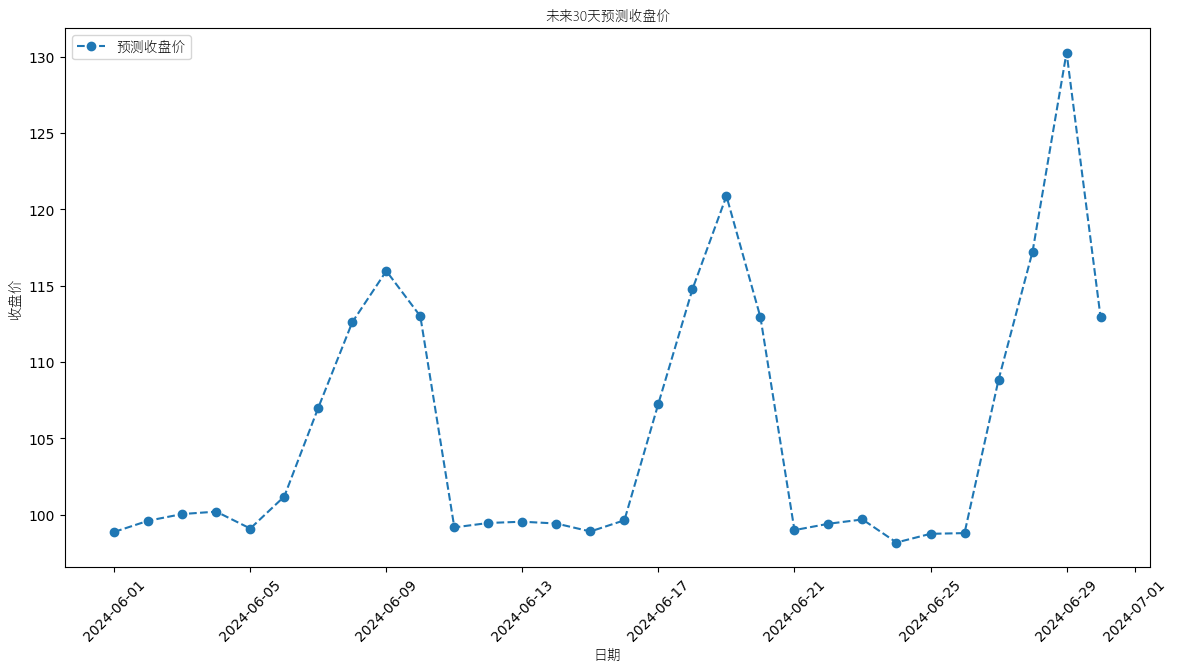

In [44]:
# 画图只显示预测的日期
plt.figure(figsize=(14, 7))
plt.plot(future_df['日期'], future_df['预测收盘价'], label='预测收盘价', linestyle='--', marker='o')

# 设置图例字体属性
plt.legend(prop=font_prop)

# 设置标题和坐标轴标签的字体属性
plt.title(f'未来{future_days}天预测收盘价', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('收盘价', fontproperties=font_prop)

# 设置 x 轴日期格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# 旋转 x 轴标签以防止重叠
plt.xticks(rotation=45)

plt.show()